In [1]:
from numpy import identity
def Laplacian(x):
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)
    M = -2*identity(n,'d')
    for i in range(1,n):
        M[i,i-1] = M[i-1,i] = 1
    return M/h**2

In [2]:
from numpy import sqrt
# Normalización de las funciones
def Normalizate(U,x):
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)
    for j in range(0,n):
        suma = 0.0
        for i in range(1,n):
            suma = suma + U[i,j]**2
        suma = suma*h
    rnorm = 1/sqrt(suma)
    # print j,’ integral (sin normalizar) =’,rnorm
    # Normalization
    rsign = 1
    if U[1,j] < 0:
        rsign = -1
    rnorm = rnorm * rsign
    for i in range(0,n):
        U[i,j] = U[i,j]*rnorm
    return

El objetivo va a ser ver como son las distintas soluciones para la ecuación de Schrödinger independiente del tiempo para los primeros estados para distintos potenciales. 

$\textbf{1.Pozo infinito + pozo finito}:$

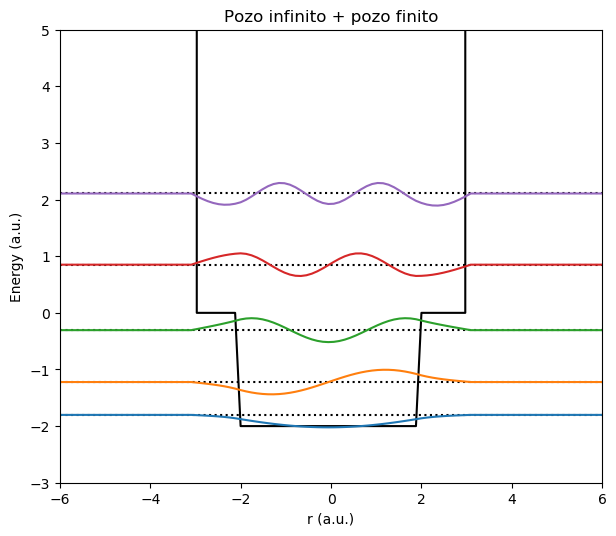

In [9]:
from numpy import diag, linspace, array
from numpy.linalg import eigh
from matplotlib.pyplot import axhline, xlabel, ylabel, plot, axis, figure, title, show
import numpy as np
nfunctions = 5
# array definitions

nsize = 100
xmin=-6
xmax=6
x = linspace(xmin,xmax,nsize)
T = array([nsize,nsize])
V = array([nsize,nsize])
H = array([nsize,nsize])
E = array([nsize])


m=1.0
T= -(0.5/m)*Laplacian(x)

def f(y):
    if y<(-3):
        return 1e50
    else:
        if y<(-2):
            return 0
        else:
            if y<2:
                return -2
            else:
                if y<3:
                    return 0
                else:
                    return 1e50


f=np.vectorize(f)
V=f(x)

#print (V)
# Hamiltonian
H = T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E,U = eigh(H)

#define plot size in inches (width, height) & resolution(DPI)
fig = figure(figsize=(7, 6), dpi=100)

# Plot the potential
plot(x,V,color='k')

# Normalization
Normalizate(U,x)

# Plot wavefunctions
for i in range(nfunctions):
    # For each of the first few solutions, plot the energy level:
    axhline(y=E[i],color='k',ls=":")
    # as well as the eigenfunction, displaced by the energy level
    # so they don’t all pile up on each other:
    plot(x,U[:,i]+E[i])
axis([xmin,xmax,-3,5])
title("Pozo infinito + pozo finito")
xlabel("r (a.u.)")
ylabel("Energy (a.u.)")
show()

$\textbf{2. Pozo infinito:}$ Usando el mismo código que antes podemos verificar que en el límite que el pozo finito tienda a ser igual que el pozo infinito.

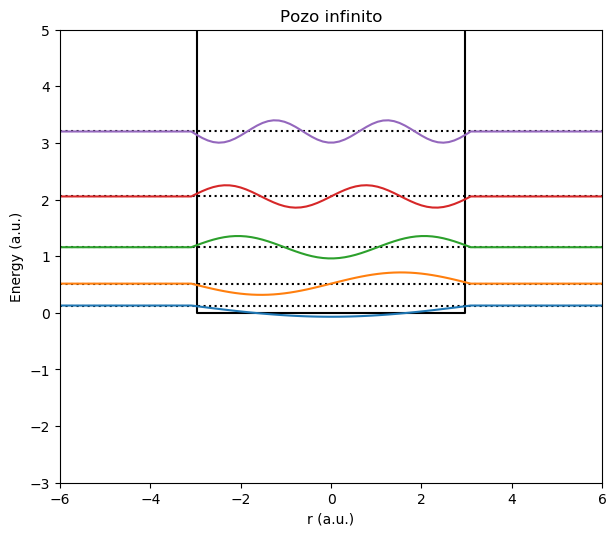

In [18]:
import numpy as np
nfunctions = 5
# array definitions

nsize = 100
xmin=-6
xmax=6
x = linspace(xmin,xmax,nsize)
T = array([nsize,nsize])
V = array([nsize,nsize])
H = array([nsize,nsize])
E = array([nsize])


m=1.0
T= -(0.5/m)*Laplacian(x)

def f(y):
    if y<(-3):
        return 1e50
    else:
        if y<(-2):
            return 0
        else:
            if y<2:
                return 0
            else:
                if y<3:
                    return 0
                else:
                    return 1e50


f=np.vectorize(f)
V=f(x)

#print (V)
# Hamiltonian
H = T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E,U = eigh(H)

#define plot size in inches (width, height) & resolution(DPI)
fig = figure(figsize=(7, 6), dpi=100)

# Plot the potential
plot(x,V,color='k')

# Normalization
Normalizate(U,x)

# Plot wavefunctions
for i in range(nfunctions):
    # For each of the first few solutions, plot the energy level:
    axhline(y=E[i],color='k',ls=":")
    # as well as the eigenfunction, displaced by the energy level
    # so they don’t all pile up on each other:
    plot(x,U[:,i]+E[i])
axis([xmin,xmax,-3,5])
title("Pozo infinito")
xlabel("r (a.u.)")
ylabel("Energy (a.u.)")
show()

$\textbf{3. delta de dirac:}$

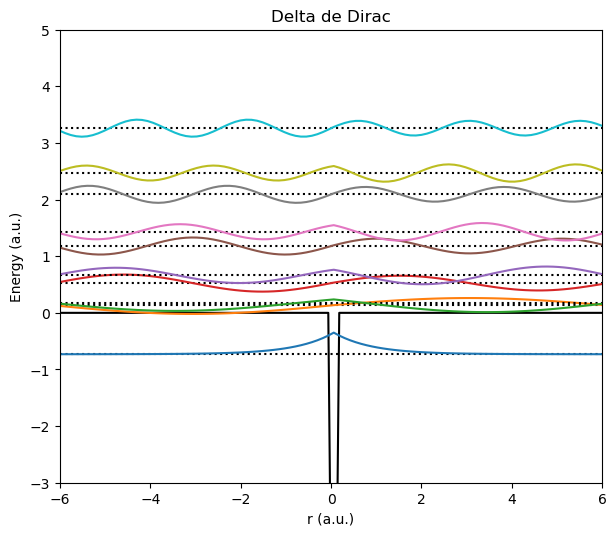

In [31]:
from scipy import signal
nfunctions = 10
# array definitions

nsize = 100
xmin=-6
xmax=6
x = linspace(xmin,xmax,nsize)
T = array([nsize,nsize])
V = array([nsize,nsize])
H = array([nsize,nsize])
E = array([nsize])


m=1.0
T= -(0.5/m)*Laplacian(x)


#f=np.vectorize(f)
#V=f(x)


V=-10*signal.unit_impulse(100,50)

#print (V)
# Hamiltonian
H = T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E,U = eigh(H)

#define plot size in inches (width, height) & resolution(DPI)
fig = figure(figsize=(7, 6), dpi=100)

# Plot the potential
plot(x,V,color='k')

# Normalization
Normalizate(U,x)

# Plot wavefunctions
for i in range(nfunctions):
    # For each of the first few solutions, plot the energy level:
    axhline(y=E[i],color='k',ls=":")
    # as well as the eigenfunction, displaced by the energy level
    # so they don’t all pile up on each other:
    plot(x,U[:,i]+E[i])
axis([xmin,xmax,-3,5])
title("Delta de Dirac")
xlabel("r (a.u.)")
ylabel("Energy (a.u.)")
show()

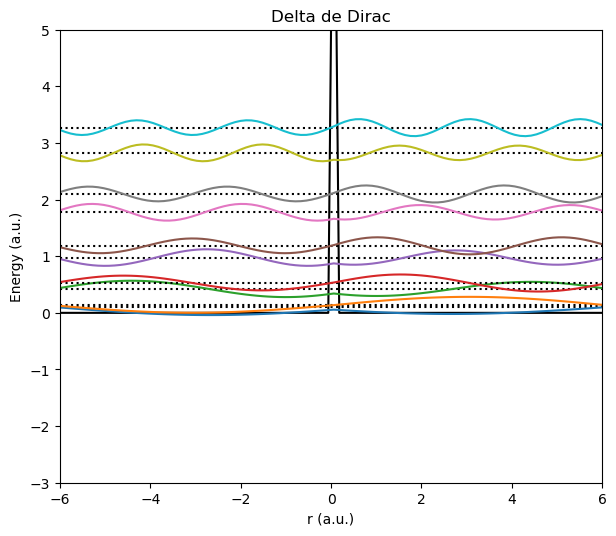

In [32]:
from scipy import signal
nfunctions = 10
# array definitions

nsize = 100
xmin=-6
xmax=6
x = linspace(xmin,xmax,nsize)
T = array([nsize,nsize])
V = array([nsize,nsize])
H = array([nsize,nsize])
E = array([nsize])


m=1.0
T= -(0.5/m)*Laplacian(x)


#f=np.vectorize(f)
#V=f(x)


V=10*signal.unit_impulse(100,50)

#print (V)
# Hamiltonian
H = T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E,U = eigh(H)

#define plot size in inches (width, height) & resolution(DPI)
fig = figure(figsize=(7, 6), dpi=100)

# Plot the potential
plot(x,V,color='k')

# Normalization
Normalizate(U,x)

# Plot wavefunctions
for i in range(nfunctions):
    # For each of the first few solutions, plot the energy level:
    axhline(y=E[i],color='k',ls=":")
    # as well as the eigenfunction, displaced by the energy level
    # so they don’t all pile up on each other:
    plot(x,U[:,i]+E[i])
axis([xmin,xmax,-3,5])
title("Delta de Dirac")
xlabel("r (a.u.)")
ylabel("Energy (a.u.)")
show()

$\textbf{4. Pozo infinito + Delta de Dirac}$

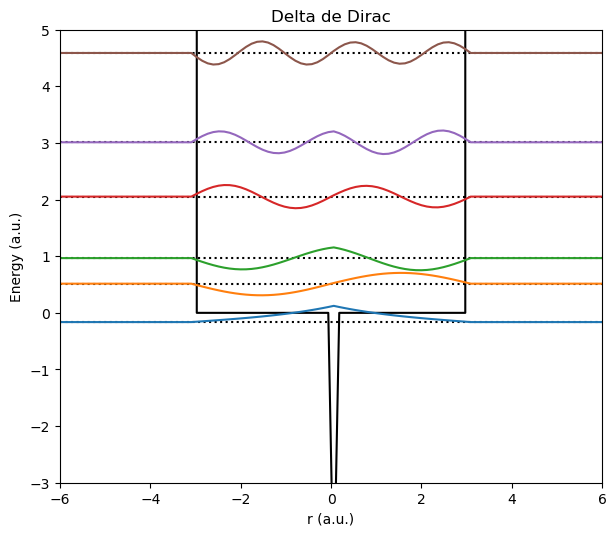

In [34]:
from scipy import signal
nfunctions = 10
# array definitions

nsize = 100
xmin=-6
xmax=6
x = linspace(xmin,xmax,nsize)
T = array([nsize,nsize])
V = array([nsize,nsize])
H = array([nsize,nsize])
E = array([nsize])


m=1.0
T= -(0.5/m)*Laplacian(x)


#f=np.vectorize(f)
#V=f(x)


V=-5*signal.unit_impulse(100,50)

def f(y):
    if y<(-3):
        return 1e50
    else:
        if y<(-2):
            return 0
        else:
            if y<2:
                return 0
            else:
                if y<3:
                    return 0
                else:
                    return 1e50


f=np.vectorize(f)
V=V+f(x)

#print (V)
# Hamiltonian
H = T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E,U = eigh(H)

#define plot size in inches (width, height) & resolution(DPI)
fig = figure(figsize=(7, 6), dpi=100)

# Plot the potential
plot(x,V,color='k')

# Normalization
Normalizate(U,x)

# Plot wavefunctions
for i in range(nfunctions):
    # For each of the first few solutions, plot the energy level:
    axhline(y=E[i],color='k',ls=":")
    # as well as the eigenfunction, displaced by the energy level
    # so they don’t all pile up on each other:
    plot(x,U[:,i]+E[i])
axis([xmin,xmax,-3,5])
title("Delta de Dirac en pozo infinito")
xlabel("r (a.u.)")
ylabel("Energy (a.u.)")
show()

$\textbf{5. Doble tunel en pozo infinito}$

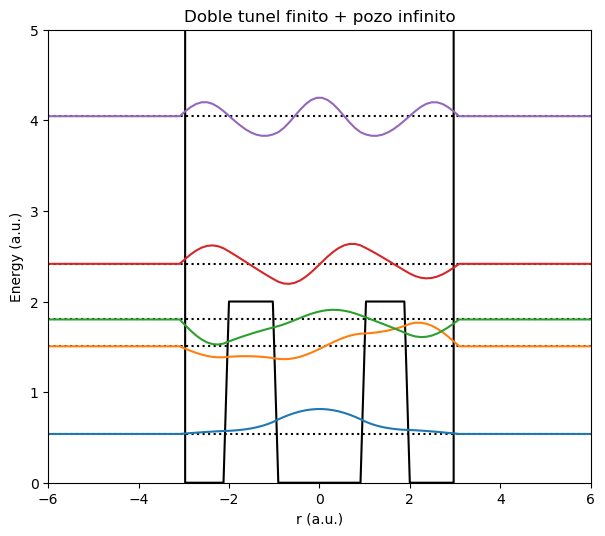

In [38]:
nfunctions = 5
# array definitions

nsize = 100
xmin=-6
xmax=6
x = linspace(xmin,xmax,nsize)
T = array([nsize,nsize])
V = array([nsize,nsize])
H = array([nsize,nsize])
E = array([nsize])


m=1.0
T= -(0.5/m)*Laplacian(x)

def f(y):
    if y<(-3):
        return 1e50
    else:
        if y<(-2):
            return 0
        else:
            if y<(-1):
                return 2
            else:
                if y<1:
                    return 0
                else:
                    if y<2:
                        return 2
                    else:
                        if y<3:
                            return 0
                        else:
                            return 1e50


f=np.vectorize(f)
V=f(x)

#print (V)
# Hamiltonian
H = T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E,U = eigh(H)

#define plot size in inches (width, height) & resolution(DPI)
fig = figure(figsize=(7, 6), dpi=100)

# Plot the potential
plot(x,V,color='k')

# Normalization
Normalizate(U,x)

# Plot wavefunctions
for i in range(nfunctions):
    # For each of the first few solutions, plot the energy level:
    axhline(y=E[i],color='k',ls=":")
    # as well as the eigenfunction, displaced by the energy level
    # so they don’t all pile up on each other:
    plot(x,U[:,i]+E[i])
axis([xmin,xmax,0,5])
title("Doble tunel finito + pozo infinito")
xlabel("r (a.u.)")
ylabel("Energy (a.u.)")
show()

$\textbf{6. Doble tunel + pozo infinito + delta de Dirac}$

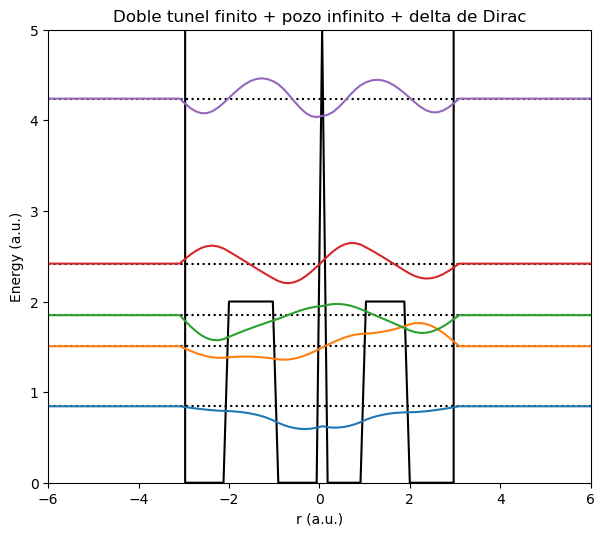

In [44]:
nfunctions = 5
# array definitions

nsize = 100
xmin=-6
xmax=6
x = linspace(xmin,xmax,nsize)
T = array([nsize,nsize])
V = array([nsize,nsize])
H = array([nsize,nsize])
E = array([nsize])


m=1.0
T= -(0.5/m)*Laplacian(x)

def f(y):
    if y<(-3):
        return 1e50
    else:
        if y<(-2):
            return 0
        else:
            if y<(-1):
                return 2
            else:
                if y<1:
                    return 0
                else:
                    if y<2:
                        return 2
                    else:
                        if y<3:
                            return 0
                        else:
                            return 1e50


f=np.vectorize(f)
V=f(x)+5*signal.unit_impulse(100,50)

#print (V)
# Hamiltonian
H = T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E,U = eigh(H)

#define plot size in inches (width, height) & resolution(DPI)
fig = figure(figsize=(7, 6), dpi=100)

# Plot the potential
plot(x,V,color='k')

# Normalization
Normalizate(U,x)

# Plot wavefunctions
for i in range(nfunctions):
    # For each of the first few solutions, plot the energy level:
    axhline(y=E[i],color='k',ls=":")
    # as well as the eigenfunction, displaced by the energy level
    # so they don’t all pile up on each other:
    plot(x,U[:,i]+E[i])
axis([xmin,xmax,0,5])
title("Doble tunel finito + pozo infinito + delta de Dirac")
xlabel("r (a.u.)")
ylabel("Energy (a.u.)")
show()

$\textbf{7. Potencial no simétrico}$

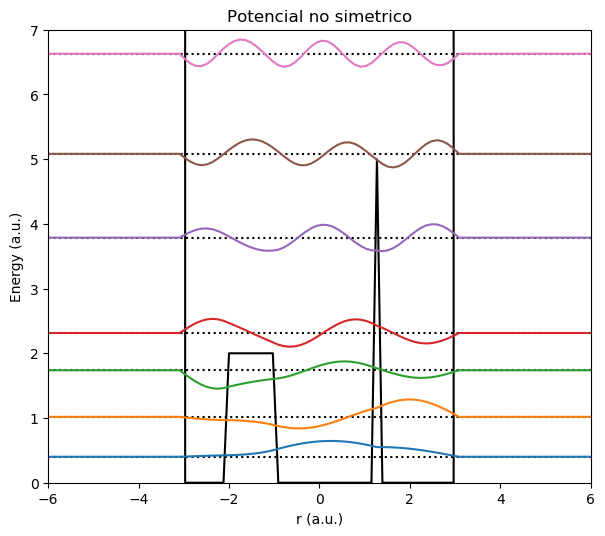

In [46]:
nfunctions = 8
# array definitions

nsize = 100
xmin=-6
xmax=6
x = linspace(xmin,xmax,nsize)
T = array([nsize,nsize])
V = array([nsize,nsize])
H = array([nsize,nsize])
E = array([nsize])


m=1.0
T= -(0.5/m)*Laplacian(x)

def f(y):
    if y<(-3):
        return 1e50
    else:
        if y<(-2):
            return 0
        else:
            if y<(-1):
                return 2
            else:
                if y<1:
                    return 0
                else:
                    if y<2:
                        return 0
                    else:
                        if y<3:
                            return 0
                        else:
                            return 1e50


f=np.vectorize(f)
V=f(x)+5*signal.unit_impulse(100,60)

#print (V)
# Hamiltonian
H = T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E,U = eigh(H)

#define plot size in inches (width, height) & resolution(DPI)
fig = figure(figsize=(7, 6), dpi=100)

# Plot the potential
plot(x,V,color='k')

# Normalization
Normalizate(U,x)

# Plot wavefunctions
for i in range(nfunctions):
    # For each of the first few solutions, plot the energy level:
    axhline(y=E[i],color='k',ls=":")
    # as well as the eigenfunction, displaced by the energy level
    # so they don’t all pile up on each other:
    plot(x,U[:,i]+E[i])
axis([xmin,xmax,0,7])
title("Potencial no simetrico")
xlabel("r (a.u.)")
ylabel("Energy (a.u.)")
show()

Podemos sacar algunas conclusiones de todos estos gráficos. 
1. En todos los potenciales simétricos, las soluciones tambien lo son, el último ejemplo muestra que si el potencial no es simétrico la solución tampoco lo es. 
2. En todos los casos el $n$-ésimo estado tiene n-1 nodos
3. En todos los casos que se consideró un potencial que es pozo infinito + otro potencial, a medida que aumenta la energía, las soluciones se parecen más a las del pozo infinito es decir a senoidales.